In [1]:
%pylab --no-import-all nbagg
#
# Temporary hack needed to make the gridtools package visible from the notebook.
# No longer needed when GT4Py will be installed as a regular Python package (i.e. through  setup.py)
#
import os
os.chdir(os.path.abspath('..'))

Populating the interactive namespace from numpy and matplotlib


In [2]:
from gridtools.stencil import Stencil, MultiStageStencil

# Example of the Game of Life implemented as an object-oriented stencil

class GameOfLife (MultiStageStencil):
    """
    Game of life implemented as a stencil
    """
    def __init__ (self):
        super ( ).__init__ ( )


    @Stencil.kernel
    def kernel (self, out_X, in_X):
        for p in self.get_interior_points (out_X):

            Y = in_X[p + (1,0,0)]  + in_X[p + (1,1,0)]   + \
                in_X[p + (0,1,0)]  + in_X[p + (-1,1,0)]  + \
                in_X[p + (-1,0,0)] + in_X[p + (-1,-1,0)] + \
                in_X[p + (0,-1,0)] + in_X[p + (1,-1,0)]

            out_X[p] = (in_X[p] and (Y == 2)) or (Y == 3)


# Generate a random initial population
# The 4 cells in the vertical directions will generate 4 different planes where the game will run

domain = (50, 50, 4)
in_X = np.zeros(domain)
in_X[19:33,19:33,:] = np.random.rand(14,14,4) > .75
out_X = np.copy(in_X)

# Initialize stencil
stencil = GameOfLife()
stencil.set_halo( (1,1,1,1) )
stencil.set_k_direction('forward')
stencil.set_backend('c++')


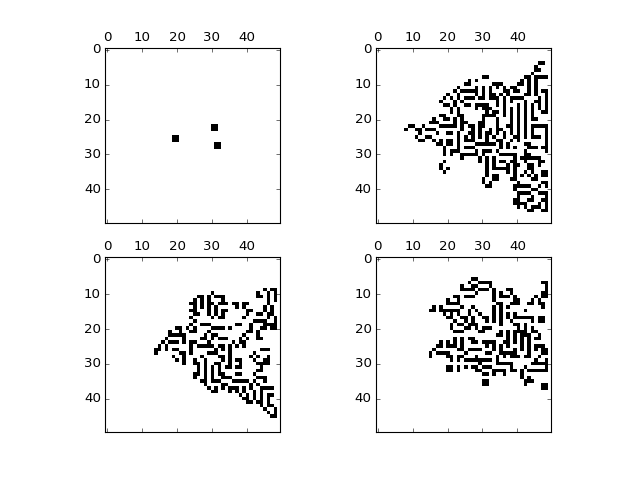

In [3]:
import matplotlib.animation as animation

# Setup resources for a real-time animation
fig = plt.figure ( )
ax0 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)

im0  = ax0.spy (in_X[:,:,0])
im1  = ax1.spy (in_X[:,:,1])
im2  = ax2.spy (in_X[:,:,2])
im3  = ax3.spy (in_X[:,:,3])

def anim_init ( ):
    im0.set_data (in_X[:,:,0])
    im1.set_data (in_X[:,:,1])
    im2.set_data (in_X[:,:,2])
    im3.set_data (in_X[:,:,3])
    return [im0,im1,im2,im3]

def anim_frame (i):
    global out_X, in_X
    stencil.run (out_X=out_X, in_X=in_X)
    im0.set_data (in_X[:,:,0])
    im1.set_data (in_X[:,:,1])
    im2.set_data (in_X[:,:,2])
    im3.set_data (in_X[:,:,3])
    in_X = out_X
    return [im0,im1,im2,im3]

# Create and run the animation
anim = animation.FuncAnimation (fig,
                                anim_frame,
                                init_func=anim_init,
                                frames=200,
                                interval=10,
                                blit=True)